In [ ]:
#@title

%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="; width:25%; height:150px; display: flex;">

<img src="https://github.com/giecaruff/logos/raw/main/SEG/seg_main_logo.png" height="80%">

</div>
<div style="; width:50%; height:250px; text-align:center;">

<br><br>

<span style="color:grey; font-size: 14pt;">Minicurso - Universidad Nacional de San Agustin de Arequipa (UNSA) - SEG<br></span>
<span style="color:#0872BE; font-size: 27pt;font-weight: bold;">Aplicações da linguagem Python na geofísica</span><br>
<span style="color:#0872BE; font-size: 16pt;font-weight: bold;">(Aplicación del lenguaje Python a la geofísica)</span>

</div>

<div style="; width:25%; height:150px; text-align:right">
<img src="https://github.com/giecaruff/logos/raw/main/SEG/seg_unsa.png" height="60%">
</div>
</div>

<div style="">
<center><span style="color:grey; font-size: 25pt;font-weight: bold;center">Autores:</span>
<br><br>

<div style=";width:172px;text-align:center;display:inline-block;"> <span style="color:#00B6D3; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span><div><img src="http://servicosweb.cnpq.br/wspessoa/servletrecuperafoto?tipo=1&id=K4460290E4" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style=";width:172px;text-align:center;display:inline-block;"> <span style="color:#00B6D3; font-size: 14pt;font-weight: bold;">Mario Martins Ramos</span><br>(Apresentador)<div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div><span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style=";width:172px;text-align:center;display:inline-block;"> <span style="color:#00B6D3; font-size: 14pt;font-weight: bold;">Rodrigo Dutra</span> <div><img src="http://servicosweb.cnpq.br/wspessoa/servletrecuperafoto?tipo=1&id=K2126019P3" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style=";width:172px;text-align:center;display:inline-block;"> <span style="color:#00B6D3; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="http://servicosweb.cnpq.br/wspessoa/servletrecuperafoto?tipo=1&id=K4438276Z9" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>
<br>
<div style="font-size: 13pt">
<span style="font-weight:bold">Baseado em:</span> <a href="https://github.com/SciTools/cartopy/tree/main/examples/lines_and_polygons">Python Para Geofisicos - Github</a><br>
<span style="font-weight:bold">Apresentação:</span> <a href="https://www.youtube.com/watch?v=Rm4tcceKXG4">Python Para Geofisicos - YouTube</a><br><br>
</div>

## Problema: Separação regional-residual de dados potenciais (gravimétricos) <br>
###  Neste exercício, vamos separar diferentes "frequências" de um dado de gravidade. Como sabemos, uma medida de campo potencial respeita o principio da superposição, ou seja, ao medir gravidade, por exemplo, o cidadão mede os efeitos produzidos por todas as fontes interferentes na região. <br>
###  Em alguns casos, algumas dessas fontes não são objeto de estudo e, portanto, devem ser descontadas do dado original. <br>
### Surge então o conceito de separação regional-residual. Neste caso, o dado de origem "regional" precisa ser destacado do "completo" a fim de realçar o dado "residual". <br>
###  Existem diversos métodos para fazer esta separação. Vamos aqui utilizar o ajuste polinomial. Vamos ver ao longo do script o procedimento.

In [ ]:
!pip install verde
!pip install gdown
!pip install cartopy

## Etapa 00: Importar as bibliotecas necessárias para realizar a atividade.

### Principais Bibliotecas:
> - cartopy >> Visualização de dados com base cartográfica
> - verde >> Biblioteca para manipulação de dados potenciais e cartográficos
> - pandas >> Gerenciamento de dados

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import verde as vd
import gdown

## Etapa 01: Utilização do Pandas para a leitura dos dados. Estes dados são referentes a um levantamento aéreo realizado no estado da Virgínia (U.S.) e estão disponibilizados gratuitamente no site do USGS (Serviço Geológico dos Estados Unidos)

### Links:
> - [Catálogo dos dados de gravidade](https://www.sciencebase.gov/catalog/item/53f59acee4b09d12e0e845ca)
> - [Informativo do dado](https://www.sciencebase.gov/catalog/item/5418b5aee4b03f26b3225d81)

In [ ]:
# Link para o acesso do dado
csv_file_link = "https://drive.google.com/uc?id=1M-WROsHqywvnUpbQCuM2ieeiXzA8Ny46"

# Baixar o dado .csv no drive como "data.csv"
gdown.download(csv_file_link, output="data.csv", quiet=False)

# Importar o dado usando a biblioteca PAndas
df = pd.read_csv("data.csv")
df

Downloading...
From: https://drive.google.com/uc?id=1M-WROsHqywvnUpbQCuM2ieeiXzA8Ny46
To: /content/data.csv
100%|██████████| 17.3M/17.3M [00:00<00:00, 154MB/s]


LINE  DIR      DATE      TIME       LONG        LAT   x_UTM18N  \
0        1010  225  2012/201  11:52:12 -77.761487  37.958875  257390.43   
1        1010  225  2012/201  11:52:24 -77.761683  37.958666  257372.53   
2        1010  225  2012/201  11:52:36 -77.761878  37.958457  257354.65   
3        1010  225  2012/201  11:52:48 -77.762074  37.958249  257336.81   
4        1010  225  2012/201  11:53:00 -77.762269  37.958042  257318.99   
...       ...  ...       ...       ...        ...        ...        ...   
104066  10010  135  2012/197  15:44:24 -77.934011  37.777797  241597.92   
104067  10010  135  2012/197  15:44:36 -77.933764  37.777642  241619.12   
104068  10010  135  2012/197  15:44:48 -77.933517  37.777488  241640.38   
104069  10010  135  2012/197  15:45:00 -77.933269  37.777334  241661.67   
104070  10010  135  2012/197  15:45:12 -77.933021  37.777179  241683.01   

          y_UTM18N   RALT    LALT  ...  SBGCOR280  ECCOR267  ECCOR260  \
0       4204849.86  118.6  116.06  ...       8.59      0.11      0.10   
1       4204827.17  116.3  104.53  ...       8.62      0.11      0.10   
2       4204804.55  112.2  101.24  ...       8.61      0.11      0.10   
3       4204781.98  109.7  105.09  ...       8.52      0.10      0.10   
4       4204759.44  111.6  106.48  ...       8.46      0.10      0.10   
...            ...    ...     ...  ...        ...       ...       ...   
104066  4185216.61  129.2  120.69  ...       8.44      0.10      0.10   
104067  4185198.84  128.8  122.40  ...       8.34      0.10      0.10   
104068  4185181.04  126.5  124.47  ...       8.23      0.10      0.10   
104069  4185163.22  122.5  127.03  ...       8.10      0.10      0.10   
104070  4185145.34  118.6  111.85  ...       7.95      0.10      0.09   

        ECCOR280  TERCOR267  TERCOR260  TERCOR280  BGL15S267  BGL15S260  \
0           0.11       0.27       0.26       0.28      -3.92      -3.63   
1           0.11       0.32       0.31       0.34      -3.95      -3.70   
2           0.11       0.35       0.34       0.36      -3.99      -3.76   
3           0.11       0.32       0.31       0.34      -4.03      -3.83   
4           0.11       0.29       0.29       0.31      -4.06      -3.90   
...          ...        ...        ...        ...        ...        ...   
104066      0.11       0.21       0.21       0.22      -0.89      -0.93   
104067      0.11       0.19       0.18       0.20      -0.94      -0.97   
104068      0.11       0.13       0.13       0.14      -0.99      -1.01   
104069      0.10       0.08       0.08       0.08      -1.03      -1.06   
104070      0.10       0.03       0.03       0.03      -1.08      -1.10   

        BGL15S280  
0           -4.01  
1           -4.08  
2           -4.14  
3           -4.21  
4           -4.27  
...           ...  
104066      -1.30  
104067      -1.35  
104068      -1.39  
104069      -1.43  
104070      -1.48  

[104071 rows x 25 columns]

## Etapa 02: Verificação cartográfica, para conferir se os dados são de onde dizem que são

### É importante lembrar que os dados cartográficos podem vir em duas formas: LAT-LONG e UTM.
> - LAT-LONG >> Ou coordenadas geográficas é referente a posição de qualquer coordenada no planeta, que considera a aproximação da terra a uma esfera (lembrando que a terra é mais próxima a um elipsóide de revolução).
> - UTM >> UTM (Universal Transversa de Mercator) é um sistema de coordenadas cartesianas bidimensional que divide a terra em várias folhas.
### As coordenadas UTM são mais úteis para criação de mapas locais (projeção), mas, quanto maior o mapa, mais imprecisa é a coordenada UTM. Já as coordenadas LAT-LONG são mais interessantes para navegação.

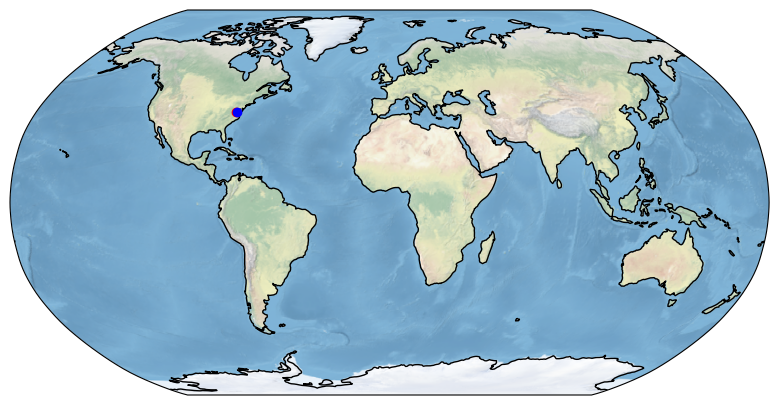

In [ ]:
# Selecionando os valores mínimos e máximos de latitude para definir um quadrado
lat_min = min(df.LAT)
lat_max = max(df.LAT)
lon_min = min(df.LONG)
lon_max = max(df.LONG)

# definindo uma figura com tamanho pré-definido
fig = plt.figure(figsize=(10, 5))

# adicionando um eixo da figura
# NOTA: a integração matplotlib e cartopy já está presente nesta etapa
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

ax.set_global()
ax.stock_img()
ax.coastlines()

# plotando os dois pontos
ax.plot(lon_min, lat_min, 'ro', transform=ccrs.PlateCarree())
ax.plot(lon_max, lat_max, 'bo', transform=ccrs.PlateCarree())
plt.show()

### Pergunta 01: Para que servem os seguintes códigos
ax.set_global()<br>
ax.stock_img()<br>
ax.coastlines()<br>
?

### Pergunta 02: Os dados LAT-LONG estão aonde deveriam estar?

### Verificando agora os dados UTM

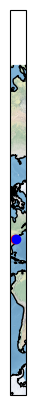

In [ ]:
# mínimos e máximos UTM
x_min = min(df.x_UTM18N)
x_max = max(df.x_UTM18N)
y_min = min(df.y_UTM18N)
y_max = max(df.y_UTM18N)

# preparando a projeção UTM para a zona 18N
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=utm_proj)

ax.set_global()
ax.stock_img()
ax.coastlines()

plt.plot(x_min, y_min, 'ro', transform=utm_proj)
plt.plot(x_max, y_max, 'bo', transform=utm_proj)

plt.show()

### O que aconteceu na imagem acima? Porque ficou como ficou?
dica: https://pt.m.wikipedia.org/wiki/Ficheiro:Utm-zones.jpg

## Vamos ver agora um mapa com mais detalhe



HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

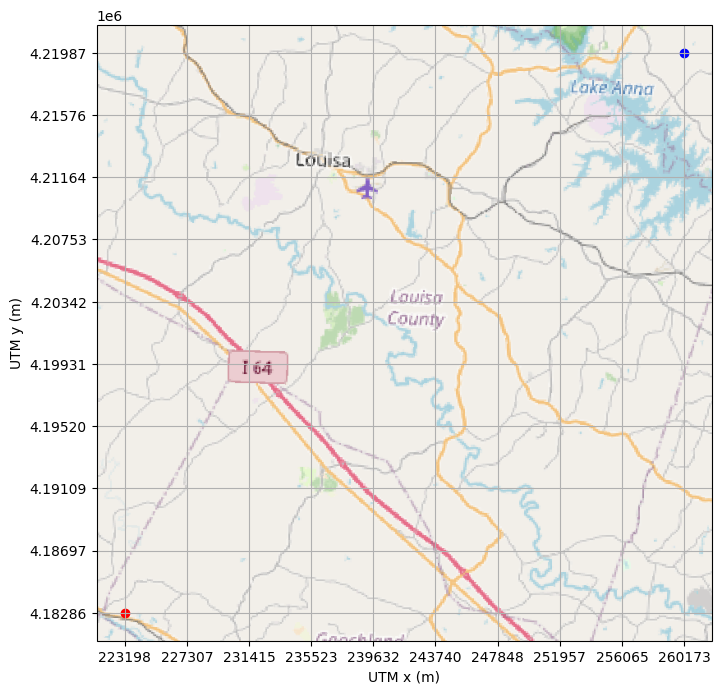

In [ ]:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

xutm_ticks = np.linspace(np.min(df.x_UTM18N),np.max(df.x_UTM18N),10)
yutm_ticks = np.linspace(np.min(df.y_UTM18N),np.max(df.y_UTM18N),10)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

# Acessando uma imagem de fundo "tiler"
tiler = cimgt.OSM()
ax.add_image(tiler, 10)

# Adicionando as bordas
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(x_min, y_min, color='red', marker='o', transform=utm_proj)
plt.scatter(x_max, y_max, color='blue', marker='o', transform=utm_proj)
plt.xticks(xutm_ticks)
plt.yticks(yutm_ticks)
plt.grid()
plt.xlabel('UTM x (m)')
plt.ylabel('UTM y (m)')

plt.show()

## Etapa 03: As verificações foram feitas e parece estar tudo correto. Agora nós vamos visualizar o dado propriamente dito

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

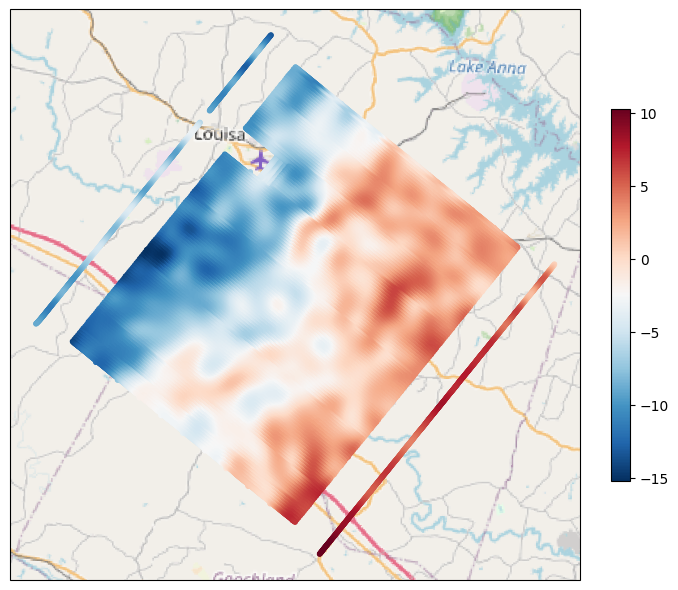

HTTP Error 400: Bad Request


In [ ]:

utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

# nota: descomente a de baixo para ver o que acontece
plt.scatter(df.x_UTM18N,df.y_UTM18N, c = df.FGRAVFL15, marker='.', transform=utm_proj, cmap='RdBu_r')
#plt.scatter(df.x_UTM18N,df.y_UTM18N, c = df.BGL15S267, marker='.', transform=utm_proj, alpha = .01, cmap='RdBu_r')
plt.grid()
plt.colorbar(fraction = 0.03)
plt.show()

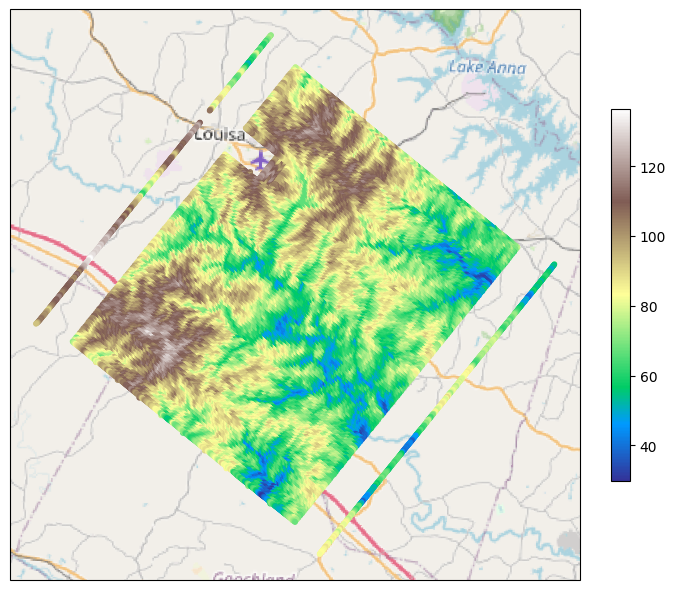

In [ ]:
# Nota: visualizando o modelo digital de elevação
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

# nota: descomente a de baixo para ver o que acontece
plt.scatter(df.x_UTM18N,df.y_UTM18N, c = df.DEM, marker='.', transform=utm_proj, cmap='terrain')
plt.grid()
plt.colorbar(fraction = 0.03)
plt.show()

### O dado acessado contém o seguinte (por índice):
FGRAVFL15    Levelled free air gravity, 15 s half-wavelength filter, 1,000 m half-wavelength grid filter (mGal)<br>
SBGCOR267    Bouguer correction, 2.67 g/cm3 (mGal)<br>
SBGCOR260    Bouguer correction, 2.60 g/cm3 (mGal)<br>
SBGCOR280    Bouguer correction, 2.80 g/cm3 (mGal)<br>
ECCOR267    Earth curvature correction, 2.67 g/cm3 (mGal)<br>
ECCOR260    Earth curvature correction, 2.60 g/cm3 (mGal)<br>
ECCOR280    Earth curvature correction, 2.80 g/cm3 (mGal)<br>
TERCOR267    Topographic correction, 2.67 g/cm3 (mGal)<br>
TERCOR260    Topographic correction, 2.60 g/cm3 (mGal)<br>
TERCOR280    Topographic correction, 2.80 g/cm3 (mGal)<br>
BGL15S267    Bouguer anomaly levelled, 15 s half-wavelength filter, 2.67 g/cm3 (mGal)<br>
BGL15S260    Bouguer anomaly levelled, 15 s half-wavelength filter, 2.60 g/cm3 (mGal)<br>
BGL15S280    Bouguer anomaly levelled, 15 s half-wavelength filter, 2.80 g/cm3 (mGal)<br>

### A gravidade observada ($g_{obs}$) é definida por:
### $g_{obs}$ =
> - atração da Terra Normal +
> - efeito de elevação acima do nível do mar (free-air) +
> - efeito das massas acima do nível do mar (Bouguer e Terreno) +
> - variações temporais ( maré ) +
> - efeito de massas que suportam as camadas topográficas (isostasia) +
> - efeitos dos contrastes de densidade na crosta (Interpretação Geológica)

### Neste trabalho, optamos por utilizar a anomalia Bouguer filtrada para 2.80 g, mas vamos ver algumas das correções aplicadas:


HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

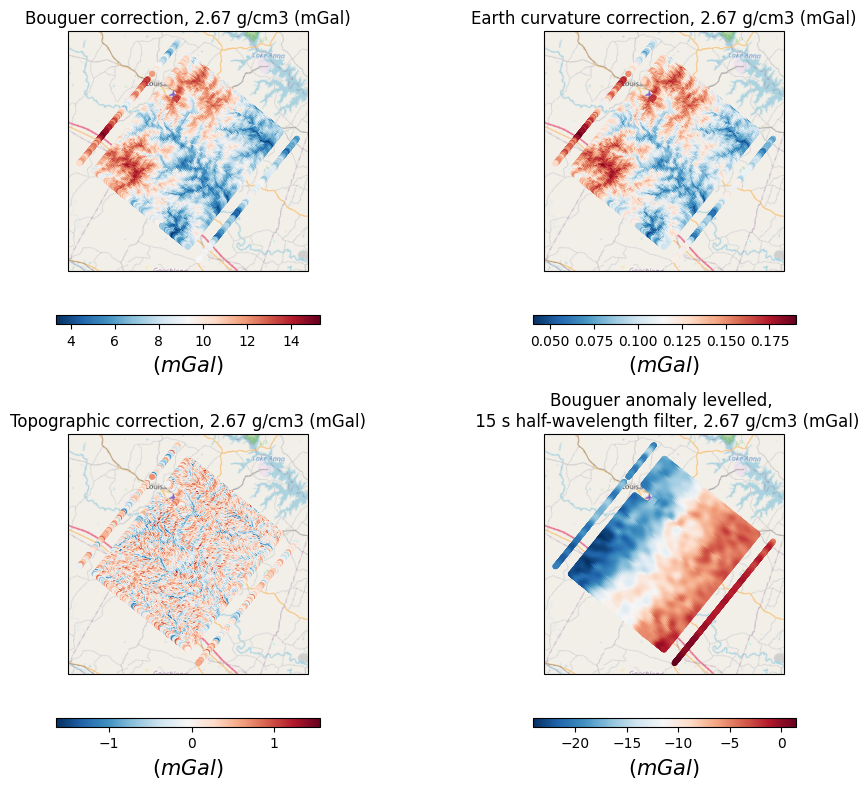

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


In [ ]:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': utm_proj}, figsize=(11, 8))

# Add OSM background to all subplots
tiler = cimgt.OSM()

for ax in axs.flatten():
    ax.add_image(tiler, 10)
    ax.grid()

# Scatter plot in the upper-left subplot
sc1 = axs[0, 0].scatter(df.x_UTM18N, df.y_UTM18N, c=df.SBGCOR267, marker='.', transform=utm_proj, cmap='RdBu_r')
axs[0, 0].set_title('Bouguer correction, 2.67 g/cm3 (mGal)')

# Scatter plot in the upper-right subplot
sc2 = axs[0, 1].scatter(df.x_UTM18N, df.y_UTM18N, c=df.ECCOR267, marker='.', transform=utm_proj, cmap='RdBu_r')
axs[0, 1].set_title('Earth curvature correction, 2.67 g/cm3 (mGal)')

# Scatter plot in the lower-left subplot
sc3 = axs[1, 0].scatter(df.x_UTM18N, df.y_UTM18N, c=df.TERCOR267, marker='.', transform=utm_proj, cmap='RdBu_r')
axs[1, 0].set_title('Topographic correction, 2.67 g/cm3 (mGal)')

# Scatter plot in the lower-right subplot
sc4 = axs[1, 1].scatter(df.x_UTM18N, df.y_UTM18N, c=df.BGL15S267, marker='.', transform=utm_proj, cmap='RdBu_r')
axs[1, 1].set_title('Bouguer anomaly levelled, \n 15 s half-wavelength filter, 2.67 g/cm3 (mGal)')

# Add colorbars to the scatter plots
cbar1 = fig.colorbar(sc1, ax=axs[0, 0], aspect=30, fraction = 0.03, orientation="horizontal")
cbar2 = fig.colorbar(sc2, ax=axs[0, 1], aspect=30, fraction = 0.03, orientation="horizontal")
cbar3 = fig.colorbar(sc3, ax=axs[1, 0], aspect=30, fraction = 0.03, orientation="horizontal")
cbar4 = fig.colorbar(sc4, ax=axs[1, 1], aspect=30, fraction = 0.03, orientation="horizontal")

cbar1.set_label('($mGal$)',fontsize=15, rotation = 0)
cbar2.set_label('($mGal$)',fontsize=15, rotation = 0)
cbar3.set_label('($mGal$)',fontsize=15, rotation = 0)
cbar4.set_label('($mGal$)',fontsize=15, rotation = 0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### De todas a anomalia bouger é a única que não apresenta uma componente topográfica (evidenciado principalmente pelos canais de drenagens)

### O dado apresentado mostra que o levantamento foi realizado a quase 45 graus da folha cartográfica. É comum que a análise não considere a totalidade do dado, mas uma zona de interesse em particular.

## Etapa 04: Agora, vamos trabalhar na delimitação de uma zona de interesse utilizando a biblioteca verde

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


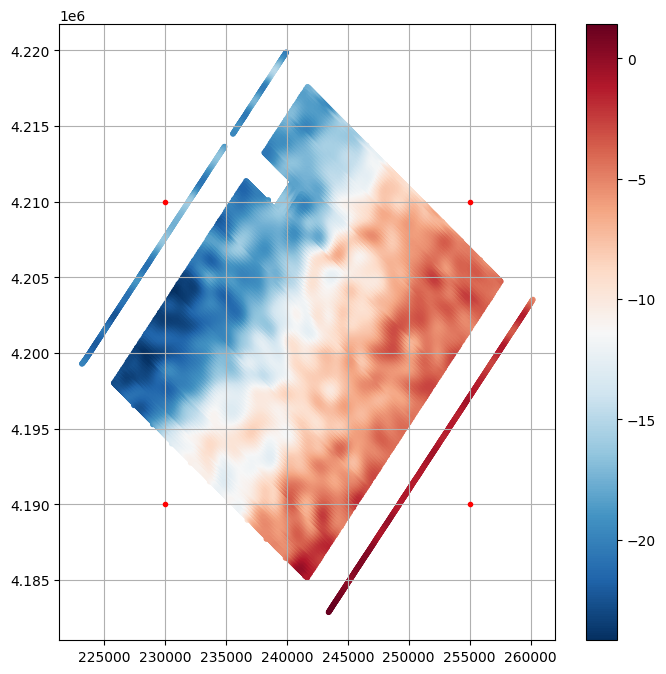

In [ ]:
# Definindo visualmente a zona de interesse
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(df.x_UTM18N,df.y_UTM18N, c = df.BGL15S267, marker='.', cmap='RdBu_r')

plt.plot(230000,4190000, 'r.')
plt.plot(255000,4190000, 'r.')

plt.plot(230000,4210000, 'r.')
plt.plot(255000,4210000, 'r.')

plt.grid()
plt.colorbar()
plt.show()

In [ ]:
# definindo a regiao de interesse com a biblioteca verde no dataframe original
df = df[vd.inside((df.x_UTM18N,df.y_UTM18N), region = [230000,255000,4190000,4210000])]
print("original =",104071,"rows")
df

original = 104071 rows
HTTP Error 400: Bad Request


LINE  DIR      DATE      TIME       LONG        LAT   x_UTM18N  \
128      1010  225  2012/201  12:17:48 -77.787667  37.931710  254999.68   
129      1010  225  2012/201  12:18:00 -77.787862  37.931508  254981.83   
130      1010  225  2012/201  12:18:12 -77.788057  37.931307  254964.01   
131      1010  225  2012/201  12:18:24 -77.788251  37.931107  254946.29   
132      1010  225  2012/201  12:18:36 -77.788444  37.930907  254928.69   
...       ...  ...       ...       ...        ...        ...        ...   
103792  10010  135  2012/197  14:49:36 -78.003626  37.819810  235615.43   
103793  10010  135  2012/197  14:49:48 -78.003386  37.819661  235636.02   
103794  10010  135  2012/197  14:50:00 -78.003147  37.819511  235656.53   
103795  10010  135  2012/197  14:50:12 -78.002908  37.819359  235676.99   
103796  10010  135  2012/197  14:50:24 -78.002670  37.819207  235697.41   

          y_UTM18N   RALT    LALT  ...  SBGCOR280  ECCOR267  ECCOR260  \
128     4201903.59  126.2  121.60  ...       4.78      0.06      0.06   
129     4201881.70  128.6  127.14  ...       4.71      0.06      0.06   
130     4201859.91  130.4  127.41  ...       4.71      0.06      0.06   
131     4201838.18  131.2  127.97  ...       4.75      0.06      0.06   
132     4201816.49  130.2  128.64  ...       4.81      0.06      0.06   
...            ...    ...     ...  ...        ...       ...       ...   
103792  4190074.41  130.3  121.40  ...       8.97      0.11      0.11   
103793  4190057.15  130.5  120.64  ...       8.85      0.11      0.11   
103794  4190039.79  130.4  119.77  ...       8.75      0.11      0.10   
103795  4190022.35  130.0  118.68  ...       8.68      0.11      0.10   
103796  4190004.79  129.7  117.00  ...       8.58      0.11      0.10   

        ECCOR280  TERCOR267  TERCOR260  TERCOR280  BGL15S267  BGL15S260  \
128         0.06      -0.56      -0.55      -0.59      -5.17      -5.38   
129         0.06      -0.61      -0.60      -0.64      -5.19      -5.40   
130         0.06      -0.61      -0.60      -0.64      -5.22      -5.42   
131         0.06      -0.61      -0.60      -0.64      -5.23      -5.44   
132         0.06      -0.56      -0.55      -0.59      -5.25      -5.46   
...          ...        ...        ...        ...        ...        ...   
103792      0.12      -0.27      -0.26      -0.28     -11.27     -11.84   
103793      0.11      -0.29      -0.29      -0.31     -11.30     -11.85   
103794      0.11      -0.35      -0.34      -0.36     -11.33     -11.87   
103795      0.11      -0.40      -0.39      -0.42     -11.36     -11.88   
103796      0.11      -0.45      -0.44      -0.48     -11.39     -11.89   

        BGL15S280  
128         -5.63  
129         -5.65  
130         -5.67  
131         -5.69  
132         -5.71  
...           ...  
103792     -12.29  
103793     -12.30  
103794     -12.32  
103795     -12.33  
103796     -12.34  

[81369 rows x 25 columns]

### Repare como o tamanho do dataframe diminui após a aplicação do corte (ou crop). A seguir vamos visualizar os dados "cropados".

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

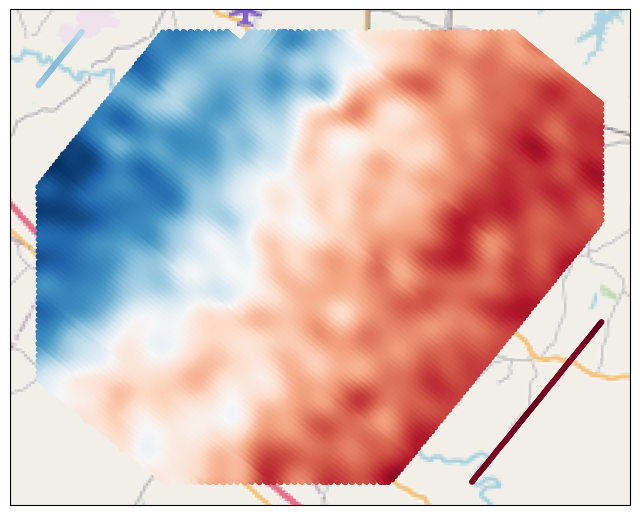

In [ ]:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(df.x_UTM18N,df.y_UTM18N, c = df.BGL15S267, marker='.', transform=utm_proj, cmap='RdBu_r')
plt.grid()
plt.show()

### Em geral, os dados de gravidade não estão apresentados em uma malhar regular. Quem faz a aquisição até tenta, mas sabemos que na prática isso é quase impossível de realizar. A malha regular auxilia, principalmente, na interpoção de dados, isto é, na estimativa de valores aonde não ocorreu amostragens.

## Etapa 05: Para facilitar o processo de interpolação, é preciso que se crie uma malha regular, mas antes precisamos remover alguns pontos.

In [ ]:
# Verificação da irregularidade da malha
x_utm = np.array(df.x_UTM18N)
print(x_utm[0] - x_utm[1])
print(x_utm[1] - x_utm[2])
print(x_utm[2] - x_utm[3])

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
17.85000000000582
17.81999999997788
17.720000000001164


In [ ]:
# Nota: Este dado já consta com um conjunto de dados em coordenadas UTM
# caso estas coordenadas estejam indisponíveis, aconsehamos o seguinte procedimento:
import pyproj
projection = pyproj.Proj(proj='merc', lat_ts = df.LAT.mean())
coordinates = projection(df.LAT.values, df.LONG.values)
coordinates

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


(array([3335403.10290859, 3335385.34068731, 3335367.66639781, ...,
        3325537.24416552, 3325523.87853366, 3325510.5129018 ]),
 array([-11227828.76784966, -11227909.80242772, -11227990.83828085, ...,
        -11318161.15238558, -11318060.07676141, -11317959.42602054]))

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


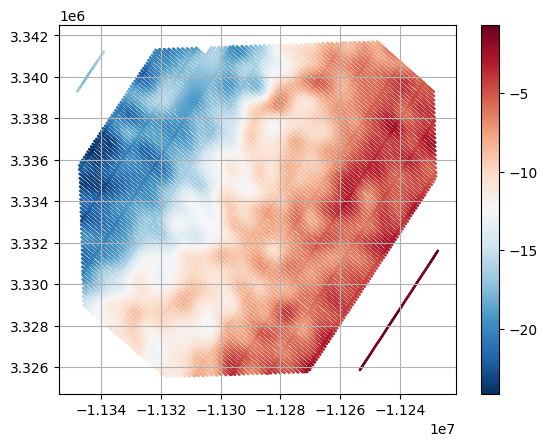

In [ ]:
# E este é o resultado:
plt.scatter(coordinates[1],coordinates[0], c = df.BGL15S267, marker='.',s = 2, cmap='RdBu_r')
plt.grid()
plt.colorbar()
plt.show()

### A redução do dado

In [ ]:
# definindo as coordenadas UTM
coordinates = (np.array(df.y_UTM18N),np.array(df.x_UTM18N))

# Aplicação da redução pela biblioteca verde
reducer = vd.BlockReduce(np.median, spacing = 400)
block_coords, block_grav = reducer.filter(coordinates, df.BGL15S267)

# verificação da redução pelo tamanho do dado
print(block_grav.shape, df.shape)

block_coords

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
(2624,) (81369, 25)


(array([4194353.765, 4194593.44 , 4194984.59 , ..., 4206197.16 ,
        4206586.77 , 4206917.55 ]),
 array([230327.17 , 230190.035, 230221.6  , ..., 254822.29 , 254784.945,
        254749.9  ]))

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


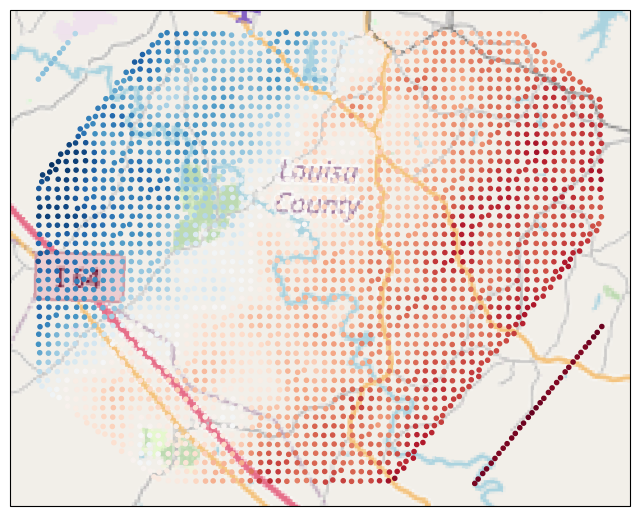

In [ ]:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(block_coords[1],block_coords[0], c =block_grav, marker='.', transform=utm_proj, cmap='RdBu_r')
plt.grid()
plt.show()

## Etapa 06: Interpolação dos dados. A biblioteca verde permite um "treinamento" e uma aplicação da interpolação no melhor estilo das bibliotecas de aprendizado de máquina. O treinamento é realizado a seguir:

## !!! ATENÇÃO !!! código lento.
quanto menor o espaçamento aplicado na redução, mais pontos, e mais lento o código fica

In [ ]:
# Etapa de "treinamento"
spline = vd.Spline()
spline.fit(block_coords, block_grav)

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request

HTTP Error 400: Bad RequestHTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


Spline(mindist=0)

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request
HTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

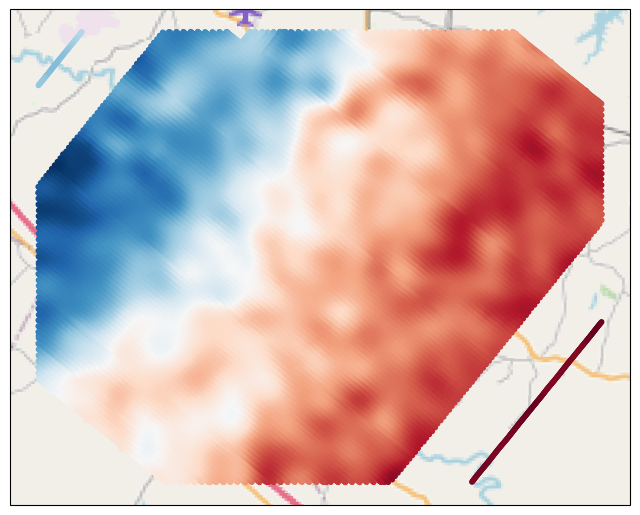

HTTP Error 400: Bad Request


In [ ]:
# Etapa de "predição" ou interpolação para os pontos disponíveis
predicted = spline.predict(coordinates)

# Visualização do mapa com os dados preditos
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(coordinates[1],coordinates[0], c = predicted, marker='.', transform=utm_proj, cmap='RdBu_r')
plt.grid()
plt.show()

### Será que funcionou? No geral parece igual, mas e no detalhe? Vamos realizar uma análise através dos resíduos:

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

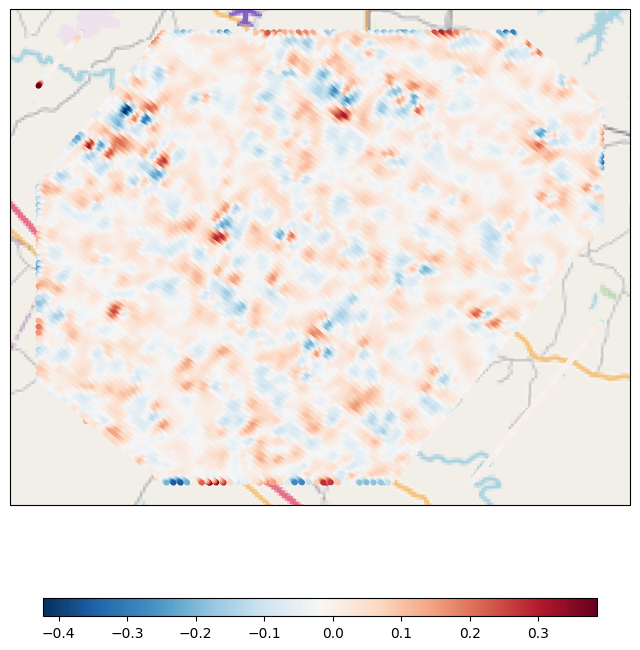

In [ ]:
# Análise de resíduo (original - predito) pra ver o desempenho
residuals = df.BGL15S267 - predicted

# Visualização do mapa de resíduos
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(coordinates[1],coordinates[0], c = residuals, marker='.', transform=utm_proj, cmap='RdBu_r')
plt.grid()
plt.colorbar(aspect=30, fraction = 0.03, orientation="horizontal")
plt.show()

### O resíduo parece alto, mas lembre-se, quanto mais lento o treinamento, melhor será o resultado. Mas faça isso no seu computador, senão o Google vai te expulsar do colaboratory! Para esta dinâmica está mais que o suficiente.

## Etapa 07: Criação da malha regular e interpolação

In [ ]:
# Usando a biblioteca verde para criar uma malha regular
region = vd.get_region(coordinates)
grid_coords = vd.grid_coordinates(region, spacing = 80)
grid_coords

(array([[4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ],
        [4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ],
        [4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ],
        ...,
        [4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ],
        [4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ],
        [4190000.96   , 4190080.95424, 4190160.94848, ..., 4209839.53152,
         4209919.52576, 4209999.52   ]]),
 array([[230000.17      , 230000.17      , 230000.17      , ...,
         230000.17      , 230000.17      , 230000.17      ],
        [230080.29663462, 230080.29663462, 230080.29663462, ...,
         230080.29663462, 230080.29663462, 230080.29663462],
        [230160.42326923, 230160.42326923, 230160

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


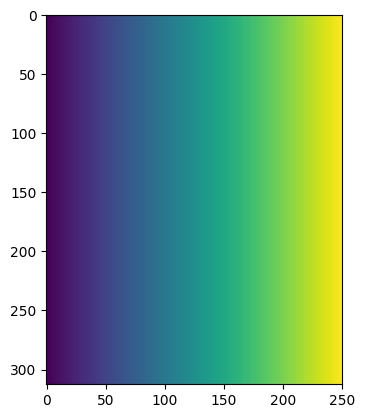

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


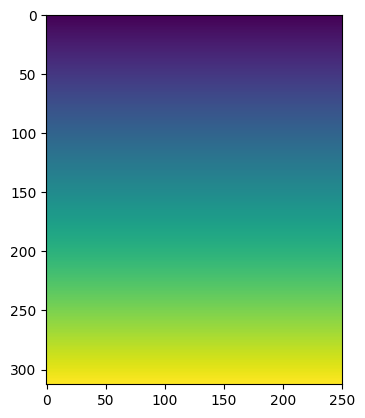

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


In [ ]:
# verificando se a malha é regular mesmo
plt.imshow(grid_coords[0])
plt.show()

plt.imshow(grid_coords[1])
plt.show()

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

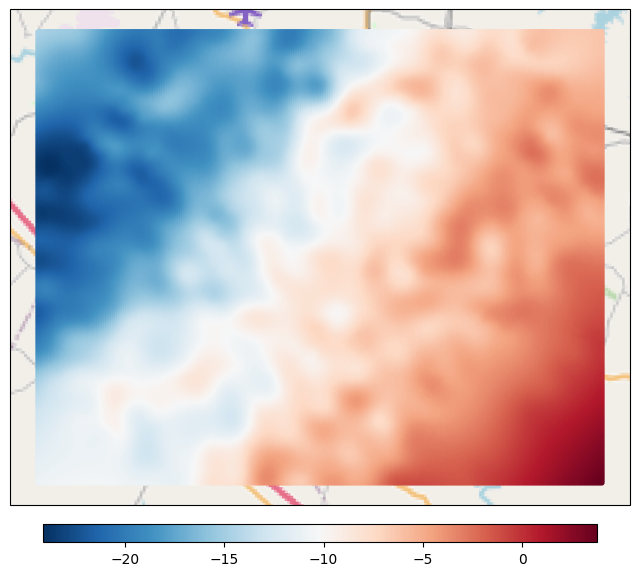

In [ ]:
# criando um dado interpolado para a malha regularmente espaçada
grid_GRAV = spline.predict(grid_coords)

# Visualização do mapa de resíduos
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(grid_coords[1],grid_coords[0], c = grid_GRAV, marker='.', transform=utm_proj, cmap='RdBu_r')
plt.grid()
plt.colorbar(aspect=30, fraction = 0.03, orientation="horizontal", pad = 0.03)
plt.show()

In [ ]:
n = 100
m = 150
XUTM = np.linspace(230000,255000, n)
YUTM = np.linspace(4190000,4210000, m)
print(XUTM)

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
[230000.         230252.52525253 230505.05050505 230757.57575758
 231010.1010101  231262.62626263 231515.15151515 231767.67676768
 232020.2020202  232272.72727273 232525.25252525 232777.77777778
 233030.3030303  233282.82828283 233535.35353535 233787.87878788
 234040.4040404  234292.92929293 234545.45454545 234797.97979798
 235050.50505051 235303.03030303 235555.55555556 235808.08080808
 236060.60606061 236313.13131313 236565.65656566 236818.18181818
 237070.70707071 237323.23232323 237575.75757576 237828.28282828
 238080.80808081 238333.33333333 238585.85858586 238838.38383838
 239090.90909091 239343.43434343 239595.95959596 239848.48484848
 240101.01010101 240353.53535354 240606.06060606 240858.58585859
 241111.11111111 241363.63636364 241616.16161616 241868.68686869
 242121.21212121 242373.73737374 242626.26262626 242878.78787879
 243131.31313131 243383.83838384 243636.36363636 243888.88888889
 244141.41414141 244393.93939394 2

In [ ]:
XX,YY = np.meshgrid(XUTM,YUTM)
print(np.shape(XX))



(150, 100)


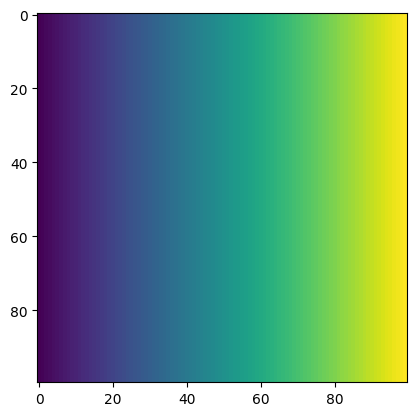

HTTP Error 400: Bad Request


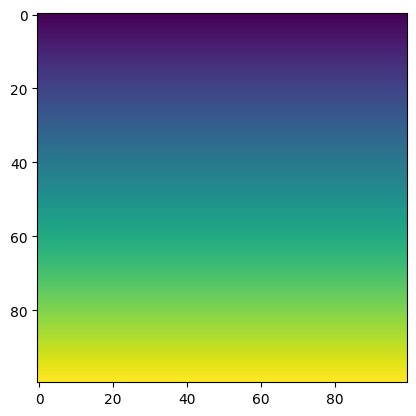

In [ ]:
# !!! OBS: como fazer a malha regular no "braço" ? !!!
# 01 criando um vetor de valores mínimos e máximos
n = 100
XUTM = np.linspace(230000,255000, n)
YUTM = np.linspace(4190000,4210000, n)

# 02 usando a função meshgrid do python pra criar a malha regular
XX,YY = np.meshgrid(XUTM,YUTM)

# 03 visualizando a criação
plt.imshow(XX)
plt.show()

plt.imshow(YY)
plt.show()

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


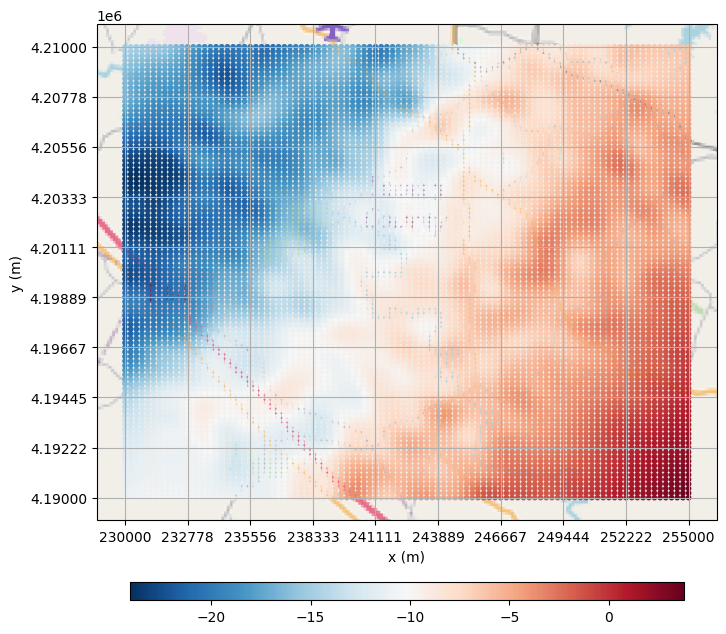

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


In [ ]:
# Interpolando nos pontos
my_grid_coords = (YY,XX)
my_grid_GRAV = spline.predict(my_grid_coords)

xutm_ticks = np.linspace(df.x_UTM18N.min(),df.x_UTM18N.max(),10)
yutm_ticks = np.linspace(df.y_UTM18N.min(),df.y_UTM18N.max(),10)

# Visualização do mapa de resíduos
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)

fig, ax = plt.subplots(subplot_kw={'projection': utm_proj}, figsize=(8, 8))

tiler = cimgt.OSM()
ax.add_image(tiler, 10)

plt.scatter(my_grid_coords[1],my_grid_coords[0], c = my_grid_GRAV, transform=utm_proj, marker='.',cmap='RdBu_r')
plt.xticks(xutm_ticks)
plt.yticks(yutm_ticks)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.colorbar(aspect=30, fraction = 0.03, orientation="horizontal", pad = 0.1)
plt.show()

## Etapa 08: Modelo matemático para representar a Anomalia Gravimétrica Regional:
> ### Hipótese utilizada neste caso: O dado regional (produzido por grandes estruturas e em maiores profundidades) pode ser representado pela seguinte equação:
> ### $ f(x,y) = m_1 + m_2 x + m_3 y + m_4 x^2 + m_5 y^2 + m_6 x^3 + m_7 y^3 + ... $   <br>
> ### A escolha pelo grau do polinômio a ser utilizado é realizado pelo usuário, baseando-se em observação da região de estudo (conhecimento geológico prévio) e também pela análise das proprias tendências presentes nos dados.

In [ ]:
# coordenadas x do dado
xp = grid_coords[1].flatten()

# coordenadas y do dado
yp = grid_coords[0].flatten()

# dado de gravidade
gc = grid_GRAV.flatten()

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


## Etapa 09: Precisamos agora encontrar o conjunto de coeficientes do polinômio que melhor descreva a anomalia gravimétrica regional. Como fazer isso??? <br>

### Podemos lançar mão do Método dos mínimos quadrados!  <br>

### Trata-se de um método de ótimização numérica cujo propósito é ajustar uma função a um conjunto de dados. O critério para fazê-lo é a minimização da soma dos quadrados dos resíduos (ou seja, a diferença entre os dados observados e os dados preditos pela função hipótese) Seguindo todas as etapas da formulação matemática do método dos mínimos quadrados, chega-se ao seguinte sistemas de equações normais em sua notação matricial: <br>

##  <center> $\mathbf{G}^T \mathbf{G} \mathbf{m} = \mathbf{G}^T \mathbf{g}_c $,  <br>


### neste caso, $\mathbf{m}$ é o conjunto de coeficientes do polinômio, $\mathbf{g}_c$ é o vetor com a anomalia gravimétrica completa, $\mathbf{G}$ é chamada de matriz de sensibilidade (N x M) e o símbolo $^T$  refere-se à transposição. Precisamos agora aprender a construir essa bendita matriz.

> ## Vejamos a formulação do problema: Neste momento é a hora de computar a seguinte equação:<br>
# <center size=4>     $ \mathbf{G} = \frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_j} $ <br>

### Escolhendo, por exemplo, um polinômio de grau 3, temos a seguinte etapa a cumprir:
> ### $ f(x,y) = m_1 + m_2 x + m_3 y + m_4 x^2 + m_5 y^2 + m_6 x^3 + m_7 y^3$  <br>
> Temos que derivar $f(x,y)$ com relação aos 7 parâmetros $m_1, m_2, ..., m_7$ da seguinte forma: <br>

> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_1} = 1$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_2} = x$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_3} = y$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_4} = x^2$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_5} = y^2$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_6} = x^3$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_7} = y^3$ <br>
    
### Agora resta organizar tudo isso em uma matriz G para finalmente resolver o problema de minimos quadrados lineares.

In [ ]:
ndat = len(xp)       # numero de dados
one  = np.ones(ndat) # vetor com uns

#S = np.array( [ one, xp, yp] ) # grau 1
#S = np.array( [ one, xp, yp, 2*xp*yp, xp**2, yp**2] )
#S = np.array( [ one, xp, yp, xp**2, yp**2] ) # grau 2
S = np.array( [ one, xp, yp, xp**2, yp**2, xp**3, yp**3] ) # grau 2
#S = np.array( [ one, xp, yp, xp**2, yp**2, xp**3, yp**3, xp**4, yp**4, xp**5, yp**5, xp**6, yp**6] ) # grau 6
# S = np.array( [ one, xp, yp, xp**2, yp**2, xp**3, yp**3, xp**4, yp**4, xp**5, yp**5, xp**6, yp**6, xp**7, yp**7] ) # grau 7

# transposta para arrumar a matrix corretamente (python troca linha por coluna para agilizar o armazenamento):
G = S.T
# Numero de dados do problema:
N = np.shape(G)[0]
# Numero de parametros do problema:
M = np.shape(G)[1]
print('numero de dados=', N,'numero de parametros=',M)

numero de dados=HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
 78563 numero de parametros= 7
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


##  Etapa 10: Agora que ja temos a matriz $\mathbf{G}$ corretamente definida, temos que resolver a equação de mínimos quadrados. Para isso, vamos recorrer ao módulo de algebra linear do Numpy (numpy.linalg). Para mais detalhes, veja o link https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg.

>### Vejamos algumas funções importantes do numpy e do numpy.linalg que eventualmente poderemos utilizar:

|   Função | O que faz | Sintaxe |
|----------|-----------|---------|
| 1 - linalg.inv| Calcula a inversa da matriz a | np.linalg.inv(a) |
| 2 - linalg.svd| Decomposição em Valores Singulares da matriz a | np.linalg.svd(a) |
| 3 - linalg.eigvals| Autovalores da matriz a | np.linalg.eigvals(a) |
| 4 - linalg.norm| Cálculo da norma matricial de a | np.linalg.norm(a) |
| 5 - linalg.det| Calcula o determinante de a | np.linalg.svd(a) |
| 6 - linalg.cond| Calcula o número de condicionamento da matriz a | np.linalg.cond(a) |
|7 - linalg.solve| Resolve o sistema linear do tipo Ax=b| np.linalg.solve(A,b)|
| 8) dot  | produto escalar entre os arrays a e b | np.dot(a,b) |
| 9) inner| produto interno entre dois arrays a e b | np.inner(a,b) |
| 10) outer| produto externo entre dois arrays a e b | np.outer(a,b) |
| 11) matmul| produto matricial entre dois arrays a e b |np.matmul(a,b) |
| 12) trace(a)| Calcula o traço da matriz a | np.trace(a) |
| 13) transpose(a)| Calcula a matriz transposta de a | np.transpose(a) |
| 14) eye( n,m )| Constroi a matriz identidade de dimensão n por m | np.eye(n,m) |

> ### Para tratarmos do nosso problema, vamos utilizar o item 7, sabendo que temos que adaptar o nosso problema de mínimos quadrados para a linalg.solve seja utilizada corretamente:

### <center> $\mathbf{A} \rightarrow \mathbf{G}^T\mathbf{G}$ <br>
### <center> $\mathbf{b} \rightarrow \mathbf{G}^T\mathbf{g}_c$ <br>

### Como podemos fazer operações envolvendo matrizes e vetores? <br>

In [ ]:
# Solucao do sistema linear usando :
A = np.dot(G.T,G)
b = np.dot(G.T,gc)
m = np.linalg.solve( A , b )
print ('vetor de parametros estimados =', m)

HTTP Error 400: Bad Request
vetor de parametros estimados = [ 1.40591028e+05 -2.07083719e-01 -2.04349534e-02  8.59943589e-07
 -1.12591686e-08 -1.18558777e-12  2.16488270e-15]


## Etapa 11: Cálculo da anomalia gravimétrica regional por meio da relação linear (gr = Gm). Lembre-se de guardar os resultados obtidos no dataframe data para salvar em um arquivo ao final de todas as etapas:

In [ ]:
# Codigo aqui:
g_reg = np.dot(G,m)

## Etapa 12: Visualização das anomalias gravimétricas completa e regional!

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad RequestHTTP Error 400: Bad Request

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

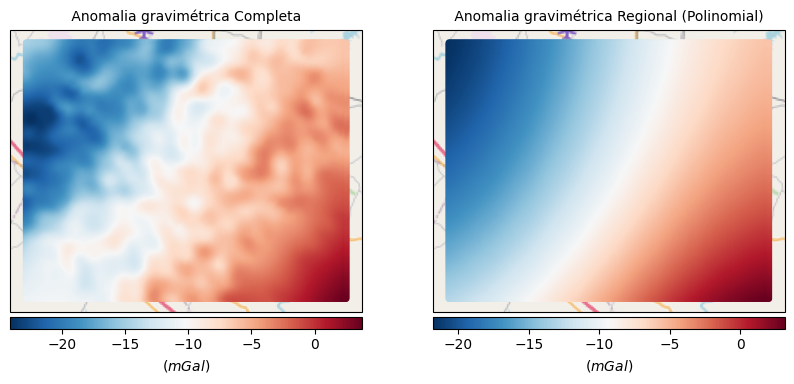

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


In [ ]:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)
tiler = cimgt.OSM()
plt.close('all')
fig = plt.figure(figsize=(10,7), facecolor='w')

###########################################################################################################################

ax1 = plt.subplot(1,2,1, projection=utm_proj)
ax1.add_image(tiler, 10)
ax1.set_title(' Anomalia gravimétrica Completa ',fontsize=10)
p1 = ax1.scatter(xp, yp, s=50.0, c=gc, marker='.', cmap='RdBu_r', transform=utm_proj)
cbar = plt.colorbar(p1, ax=ax1, aspect=30, fraction=0.03, orientation="horizontal", pad = 0.01)
cbar.set_label('$(mGal)$', fontsize=10, rotation=0)

###########################################################################################################################

ax2 = plt.subplot(1,2,2, projection=utm_proj)
ax2.add_image(tiler, 10)
ax2.set_title(' Anomalia gravimétrica Regional (Polinomial) ',fontsize=10)
p2 = ax2.scatter(xp, yp, s=50.0, c=g_reg, marker='.', cmap='RdBu_r', transform=utm_proj)
cbar = plt.colorbar(p2, ax=ax2, aspect=30, fraction=0.03, orientation="horizontal", pad=0.01)
cbar.set_label('($mGal$)', fontsize=10, rotation=0)

plt.show()

## Etapa 13: Remoção (subtração) da componente regional para finalmente obter a anomalia gravimétrica "residual":

In [ ]:
g_res = gc - g_reg

## Etapa 14: Plot da de todas as etapas (Anomalia completa, regional e residual)

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad 

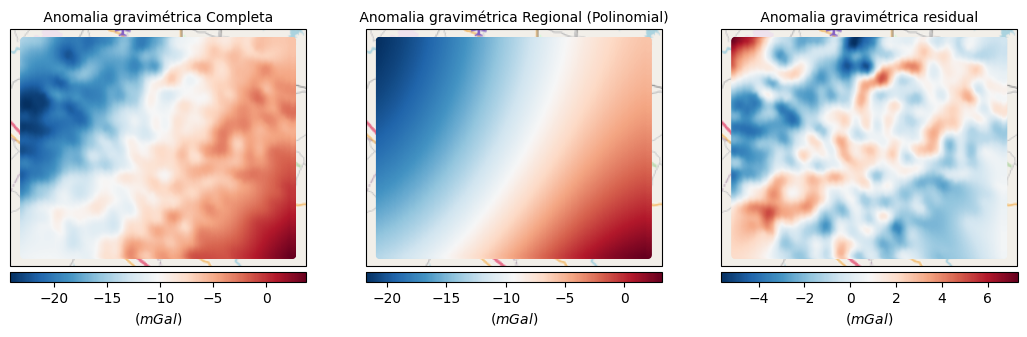

In [ ]:
# Plot residual bouguer anomaly:
utm_proj = ccrs.UTM(zone=18, southern_hemisphere=False)
tiler = cimgt.OSM()
plt.close('all')
fig = plt.figure(figsize=(13,7), facecolor='w')

###########################################################################################################################

ax1 = plt.subplot(1,3,1, projection=utm_proj)
ax1.add_image(tiler, 10)
ax1.set_title(' Anomalia gravimétrica Completa ',fontsize=10)
p1 = ax1.scatter(xp, yp, s=50.0, c=gc, marker='.', cmap='RdBu_r', transform=utm_proj)
cbar = plt.colorbar(p1, ax=ax1, aspect=30, fraction=0.03, orientation="horizontal", pad = 0.01)
cbar.set_label('$(mGal)$', fontsize=10, rotation=0)

###########################################################################################################################

ax2 = plt.subplot(1,3,2, projection=utm_proj)
ax2.add_image(tiler, 10)
ax2.set_title(' Anomalia gravimétrica Regional (Polinomial) ',fontsize=10)
p2 = ax2.scatter(xp, yp, s=50.0, c=g_reg, marker='.', cmap='RdBu_r', transform=utm_proj)
cbar = plt.colorbar(p2, ax=ax2, aspect=30, fraction=0.03, orientation="horizontal", pad=0.01)
cbar.set_label('($mGal$)', fontsize=10, rotation=0)

###########################################################################################################################

ax3 = plt.subplot(1,3,3, projection=utm_proj)
ax3.add_image(tiler, 10)
ax3.set_title(' Anomalia gravimétrica residual ',fontsize=10)
p3 = ax3.scatter(xp, yp, s=50.0, c=g_res, marker='.', cmap='RdBu_r', transform=utm_proj)
cbar = plt.colorbar(p3, ax=ax3, aspect=30, fraction=0.03, orientation="horizontal", pad=0.01)
cbar.set_label('($mGal$)', fontsize=10, rotation=0)

plt.show()

## Desafio D1: E se o grau do polinômio for 6? 10? 100? Fica como exercício testar depois e verificar uma forma de automatizar esse processo!

<img src="https://geology.blogs.wm.edu/files/2016/08/Screen-shot-2016-08-01-at-12.16.50-PM.png">

In [ ]:
#@title

%%HTML
<br><br><br>
<center><big><big><big><big><big> !!! **FIM** !!! <br>  MUITO OBRIGADO PELA SUA ATENÇÃO E ESPERO QUE TENHA SIDO INTERESSANTE A ATIVIDADE!
<br><br><br>

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
